# 5. Graphiques sous Julia

Points abordés:
1. Un peu de doc
1. Backends
1. Plots
1. Premiers graphiques



## Un peu de doc


- commencer par [Plotting in Julia](https://julialang.org/downloads/plotting.html) sur `julialang.org`
- puis [wikibooks](https://en.wikibooks.org/wiki/Introducing_Julia/Plotting) (+++)

## Backends


### Quid est ?

> ***Front-end*** et ***back-end*** (les traductions françaises de ces expressions prêtent à confusion) sont des termes utilisés pour caractériser les programmes d'interface et de service par rapport à l'utilisateur (humain ou machine) de ces interfaces et services. L'utilisateur interagit avec le front-end (partie émergée de l'iceberg). Le back-end (partie immergée de l'iceberg) sert à soutenir le front-end, en étant plus proche de la ressource requise. Le back-end interagit directement avec le front-end ou, plus souvent, avec un programme appelé à partir d'un programme qui assure la médiation front-end/back-end.

Julia propose [différents backends graphiques](http://docs.juliaplots.org/latest/backends/) et il est possible de commuter d'un backend l'autre. Il y en a pour tous les goûts des simples, mais rapides, aux sophistiqués, mais lourds, offrant des esthétiques différentes, puisque tout le monde le sait, [de gustibus](https://fr.wiktionary.org/wiki/des_goûts_et_des_couleurs,_on_ne_discute_pas)...

### Quelques backends

- **`Plots`** : [
[dépôt](https://github.com/JuliaPlots/Plots.jl), 
[doc](http://docs.juliaplots.org/),
[tuto](http://docs.juliaplots.org/latest/tutorial/),
[latest](http://docs.juliaplots.org/latest/)
] n'est pas un package graphique, c'est un **méta-package graphique** qui regroupe différents packages graphiques sous une unique API (interface de programmation applicative) permettant de commuter d'un "backend" à l'autre
    - backends intégrés: [PyPlot](http://docs.juliaplots.org/latest/examples/pyplot/), [GR](http://docs.juliaplots.org/latest/examples/gr/), [PlotlyJS](http://docs.juliaplots.org/latest/examples/plotlyjs/), [PGFPlots](http://docs.juliaplots.org/latest/examples/pgfplots/) etc.
    - voir le [comparatif](http://docs.juliaplots.org/latest/backends/).


- **`PyPlot`** [[dépôt](https://github.com/JuliaPy/PyPlot.jl)]
     - interface vers la librairie `Matplotlib` de Python, plus précisément vers le module `matplotlib.pyplot`
     - (pros) un tas de fonctionnalités, très consolidé (cons) passe par Python, dépendances


- **`PGFPlots`** [[dépôt](https://github.com/sisl/PGFPlots.jl)] interface vers la librairie [pgfplots](https://ctan.org/pkg/pgfplots)
     - graphique LaTeX basé sur PGF/TikZ
     - (pros) joli (cons) difficile à installer et grosses dépendances


- **`Plotly/PlotlyJS`** [[dépôt](https://github.com/sglyon/PlotlyJS.jl)] interface Julia vers la librairie  [`plotly.js`](https://plot.ly/javascript/)
    - (pros) fonctionnalités, 2D/3D, solide, interactif
    - (cons) lent ?


- **``GR``** [[dépôt](https://github.com/jheinen/GR.jl)] interface Julia de [`GR`](http://gr-framework.org)    
    - (pros) rapide, 2D/3D
    - (cons) interactivité faible, en développement


- **`Gadfly`** [[dépôt](https://github.com/GiovineItalia/Gadfly.jl)] [Gadfly](http://gadflyjl.org/stable/) basé sur [ggplot2](http://ggplot2.org) `R` (et le livre de Leland Wilkinson "The Grammar of Graphics").
    - (pros) esthétique intéressante
    - (cons) déconseillé (deprecated en anglais) selon `Plots`





|                 |                             |
|:-----------------|:-----------------------------|
| vitesse         | `G`                         |
| interactivité   | `PyPlot`, `Plotly/PlotlyJS` |
| possibilités    | `PyPlot`, `Plotly(JS)`, `GR`       |
| esthétique      | `Plotly(JS)`, `PGFPlots`             |
| 3D              | `PyPlot`, `GR`, `Plotly(JS)`     |

## Plots

### L'écosystème Plots



L'environnement [Plots](https://github.com/JuliaPlots/Plots.jl) est développé et maintenu par le très actif [Tom Breloff](http://www.breloff.com). Cet environnement est entouré d'un [écosystème](http://docs.juliaplots.org/latest/ecosystem/). Les autres backends peuvent être utilisés indépendamment mais `Plots` fournit une interface simple.

La conception de `Plots` (et plus spécifiquement de `RecipesBase`) consiste à lier des fonctionnalités disparates dans une expérience utilisateur cohérente et cohérente. 

Des packages proposent leurs propres types, l'approche proposée par `Plots` permet au développeur du package de définir de recettes permettant de tracer ses types, voir la macro `@recipe`. L'utilisateur pourra se contenter alors d'appeler  `plot(ceci)` ou `plot(cela)` sans se soucier de la nature de `ceci` ou `cela`.  `Plots` propose des outils comme [RecipesBase](https://github.com/JuliaPlots/RecipesBase.jl) qui implémente des macros pratiques comme `@recipe` et `@series`. Voir aussi la collection de recettes [PlotRecipes](https://github.com/JuliaPlots/PlotRecipes.jl).

`Plots` est un noyau traitant purement graphique, d'une certaine il encapsule certains packages graphiques afin de proposer un ensemble cohérent, mais il est aussi connectés à d'autres packages 

- `StatPlots` [[dépôt](https://github.com/JuliaPlots/StatPlots.jl)]: développé par [Tom Breloff](http://www.breloff.com) et initialement au sein de `Plots`, ce package propose des recettes *statistiques* pour les concepts et les types introduits dans l'organisation `JuliaStats`, destinées à être utilisées avec `Plots`.



- `DifferentialEquations` [[dépôt](https://github.com/JuliaDiffEq/DifferentialEquations.jl), [doc](http://docs.juliadiffeq.org/latest/)]: développé par [Chris Rackauckas](http://chrisrackauckas.com), ce package traîte de l'intégration numérique des équations différentielles ordinaires ou stochastiques, ainsi que de certains modèles mixtes à sauts. Ce package a rejoint l'écosystème `Plots`: ainsi la même commande `plot(sol)` permet de tracer la solution d'une [équation différentielle ordinaire](http://docs.juliadiffeq.org/latest/tutorials/ode_example.html#Plotting-Solutions-1) aussi bien qu'un [processus de diffusion à sauts](http://docs.juliadiffeq.org/latest/tutorials/jump_diffusion.html#Defining-a-ConstantRateJump-Problem-1). 

### Données et attributs

Dans `Plots` les données sont passés par position et les attributs par mots-clefs, comme:
```julia
plot(y, color = :blue)
```
Voir: 
[Installation](http://docs.juliaplots.org/latest/install/)
[Basics](http://docs.juliaplots.org/latest/basics/)
[Input Data](http://docs.juliaplots.org/latest/input_data/)
[Attributes](http://docs.juliaplots.org/latest/attributes/)
[Output](http://docs.juliaplots.org/latest/output/)
[Backends](http://docs.juliaplots.org/latest/backends/)
[Colors](http://docs.juliaplots.org/latest/colors/)
[Animations](http://docs.juliaplots.org/latest/animations/), par exemple les [attributs graphiques](http://docs.juliaplots.org/latest/attributes/) (des lignes, des nuages de points...).

Les différents attributs ne sont pas tous pris en charge par tous les backends: voir la liste
de [attributs pris en charge](http://docs.juliaplots.org/latest/supported/) selon les backends.

### Exemples

Voir le même ensemble de courbes traités par différents backends: [PyPlot](http://docs.juliaplots.org/latest/examples/pyplot/) [GR](http://docs.juliaplots.org/latest/examples/gr/) [PlotJS](http://docs.juliaplots.org/latest/examples/plotlyjs/) [PGFPlots](http://docs.juliaplots.org/latest/examples/pgfplots/)

## Premiers graphiques

Si ce n'est déjà fait, installer:

In [1]:
#Pkg.add("Plots")

In [2]:
using Plots # à faire lorsque l'on commence une session de graphiques

Ce que l'on veut tracer:

In [3]:
x = 0:0.1:1
y = cos.(50*x) # c'est un cosinus vectorisé

11-element Array{Float64,1}:
  1.0     
  0.283662
 -0.839072
 -0.759688
  0.408082
  0.991203
  0.154251
 -0.903692
 -0.666938
  0.525322
  0.964966

Depuis Plots on fait appel au très interactif `plotly` (qui envoie des données sur le net):

In [4]:
plotly() # on fait appel au backend Plotly, très interactif mais envoie des données sur le net :-(
plot(x,y)

puis on bascule à `pyplot` sans changer la commande:


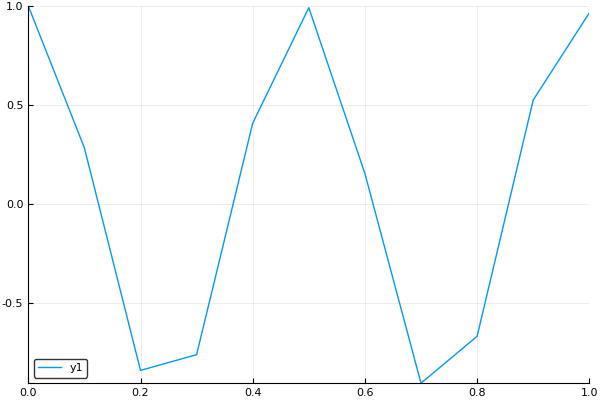

In [5]:
pyplot() # moins sophistiqué que plotly mais garde ses données en local !
plot(x,y) # la commande ne change pas

deux colonnes au tableau `y` produit deux courbes:


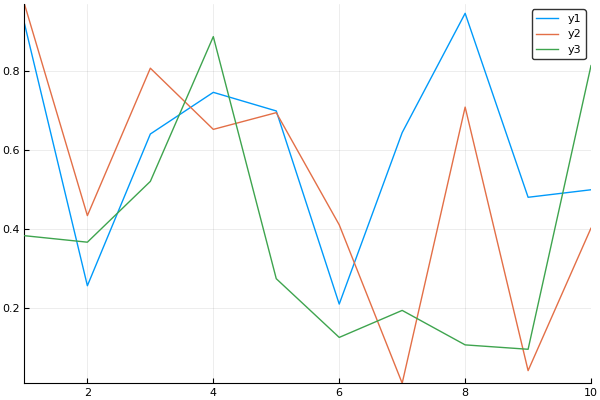

In [6]:
x = 1:10; y = rand(10,3) # 2 colonnes
plot(x,y)

on peut **rajouter** quelque chose au graphique précédent avec `plot!` i.e. `plot` suivi de `!`.
En fait `!` [change les arguments de la fonction](https://docs.julialang.org/en/latest/manual/style-guide/#Append-!-to-names-of-functions-that-modify-their-arguments-1):


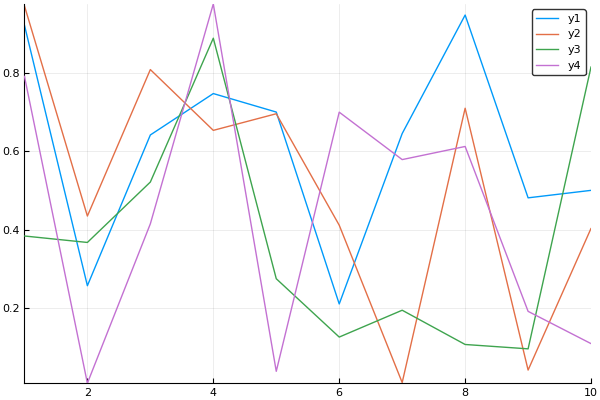

In [7]:
z = rand(10)
plot!(x,z)   # rajoiuté au graphique précédent

et rajouter des attribbuts:


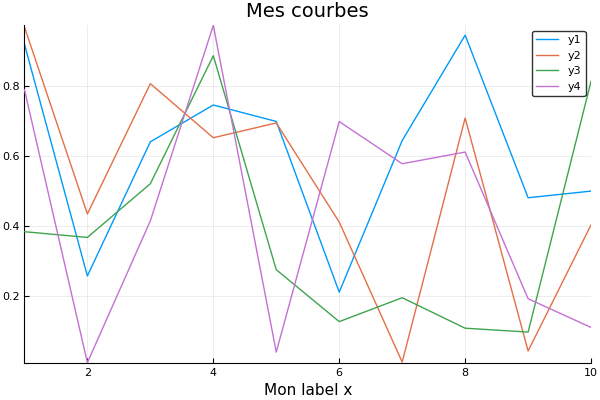

In [8]:
xlabel!("Mon label x")
title!("Mes courbes")

puis sauver ce graphique dans un fichier (c'est très simple)

In [9]:
savefig("ZZ_bac_a_sable/myplot.pdf") # sauve la figure en PDF (dans le dossier z_bac_a_sable)
savefig("ZZ_bac_a_sable/myplot.png") # idem mais en png (simple non ?)

On peut aussi simplement tracer des fonctions génériques

In [10]:
equation(x) = sin(x) + sin(2x)

equation (generic function with 1 method)


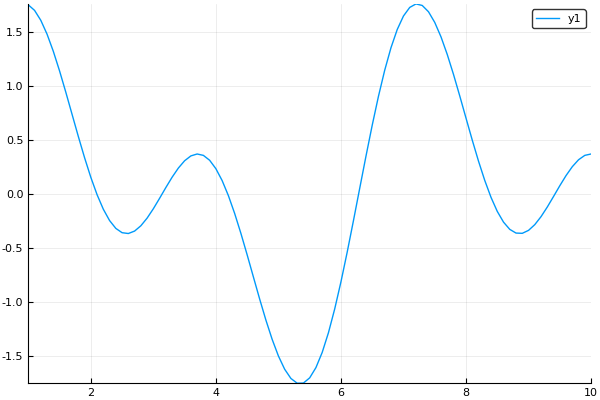

In [11]:
plot(equation, 1:0.1:10)


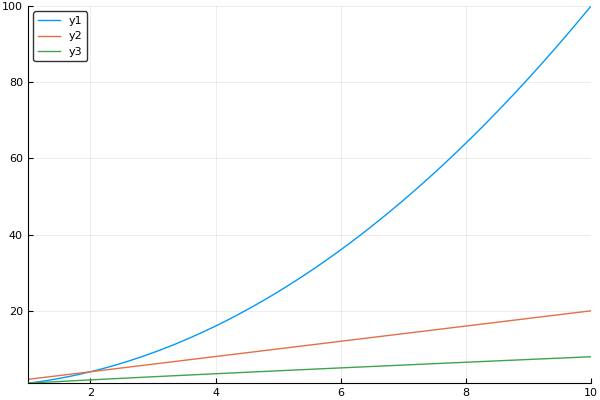

In [12]:
f(x) = x.^2
g(x) = 2*x
t = 1:0.1:10
plot(t,[f,g,t.^.9])